Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
len(df['id'])

140700

In [6]:
incompletes = [x for x in df.columns if df[x].isnull().sum() > 10000 and df[x].dtype !='object'] #
incompletes

['Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction']

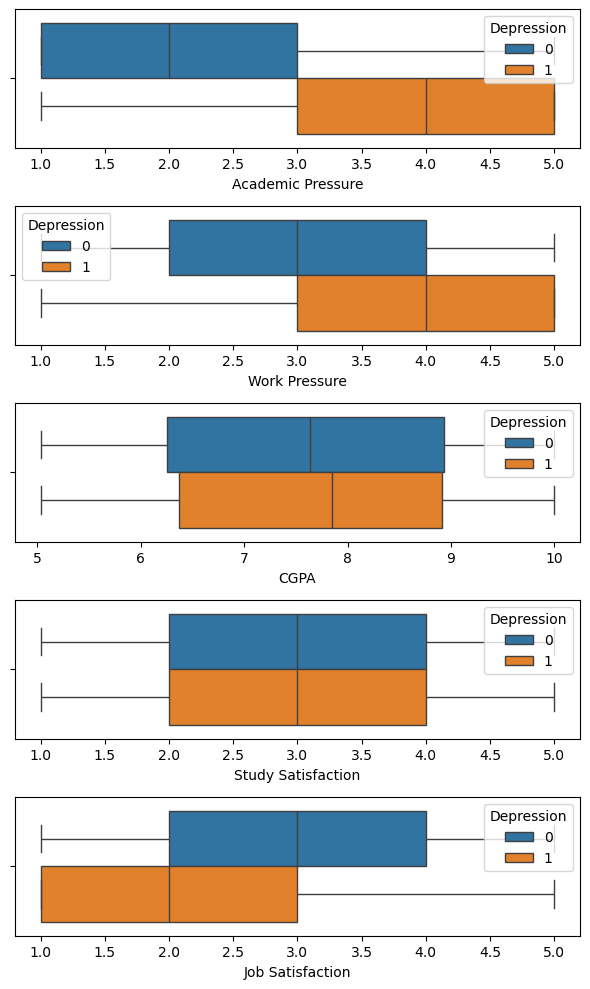

In [7]:
plt.figure(figsize= (6,10))
for n,col in enumerate(incompletes):
    plt.subplot(len(incompletes),1,n+1)
    sns.boxplot(df[~df[col].isnull()], x = col , hue = 'Depression')
plt.tight_layout()

In [8]:
feats = df.columns.to_list()
feats.remove('id')
feats.remove('Name')
numericals = [x for x in feats if df[x].dtype !='object']
categoricals = [x for x in feats if df[x].dtype =='object']

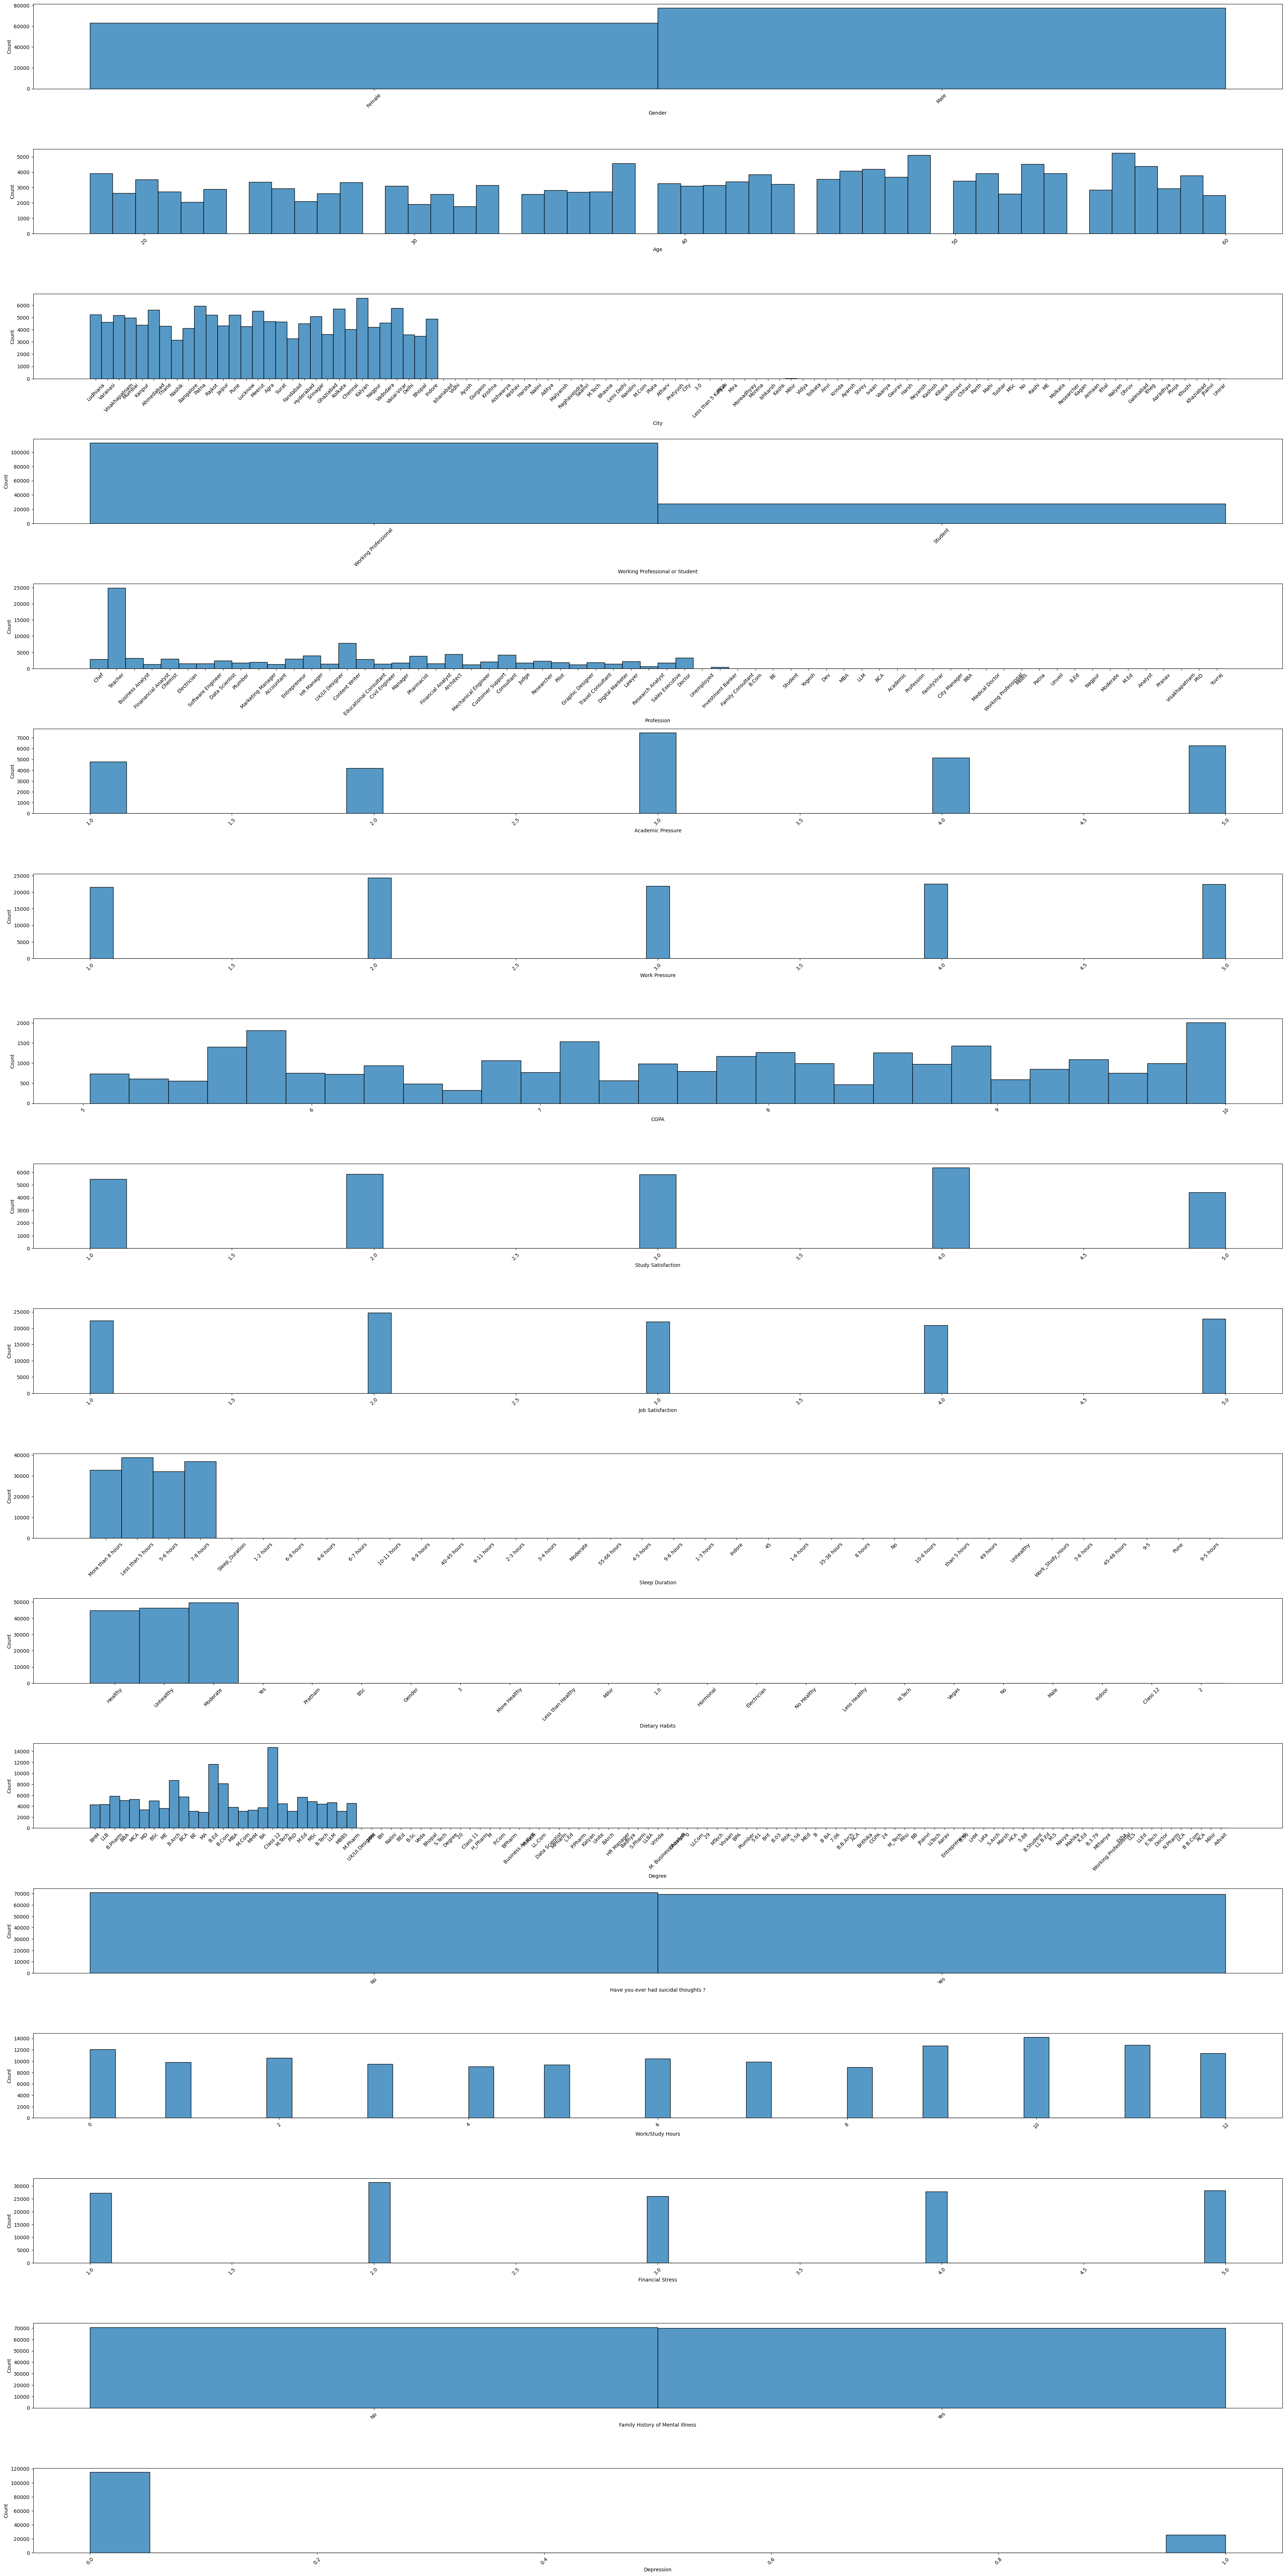

In [9]:
plt.figure(figsize= (36,72))
for n,col in enumerate(feats):
    plt.subplot(len(feats),1,n+1)
    sns.histplot(df, x = col)
    plt.xticks(rotation = 45)
plt.tight_layout()

#### Data Cleaning

To be cleaned: City, Profession, Sleep Duration, Degree, Dietary habits

In [10]:
city_val_counts = df['City'].value_counts()
df1 = df.copy()
df1['City'] = df1['City'].apply(lambda x: 'Others' if city_val_counts[x] < 50 else x)
df1['City'].value_counts()



City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Others             98
Name: count, dtype: int64

In [11]:
prof_val_counts = df['Profession'].value_counts()
df1['Profession'] = df1['Profession'].apply(lambda x: 'Others' if not pd.isna(x) and prof_val_counts[x] < 50 else x)
df1['Profession'].value_counts()

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

In [12]:
sleep_val_counts = df['Sleep Duration'].value_counts()
df1['Sleep Duration'] = df1['Sleep Duration'].apply(lambda x: 'Others' if not pd.isna(x) and sleep_val_counts[x] < 50 else x)
df1['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
Others                  79
Name: count, dtype: int64

In [13]:
degree_val_counts = df['Degree'].value_counts()
df1['Degree'] = df1['Degree'].apply(lambda x: 'Others' if not pd.isna(x) and degree_val_counts[x] < 50 else x)
df1['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4537
M.Tech       4475
B.Tech       4425
LLB          4348
BHM          4305
MBA          3818
BA           3750
ME           3632
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3082
MA           2887
Others        114
Name: count, dtype: int64

In [14]:
diet_val_counts = df['Dietary Habits'].value_counts()
df1['Dietary Habits'] = df1['Dietary Habits'].apply(lambda x: 'Others' if not pd.isna(x) and diet_val_counts[x] < 50 else x)
df1['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49705
Unhealthy    46227
Healthy      44741
Others          23
Name: count, dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

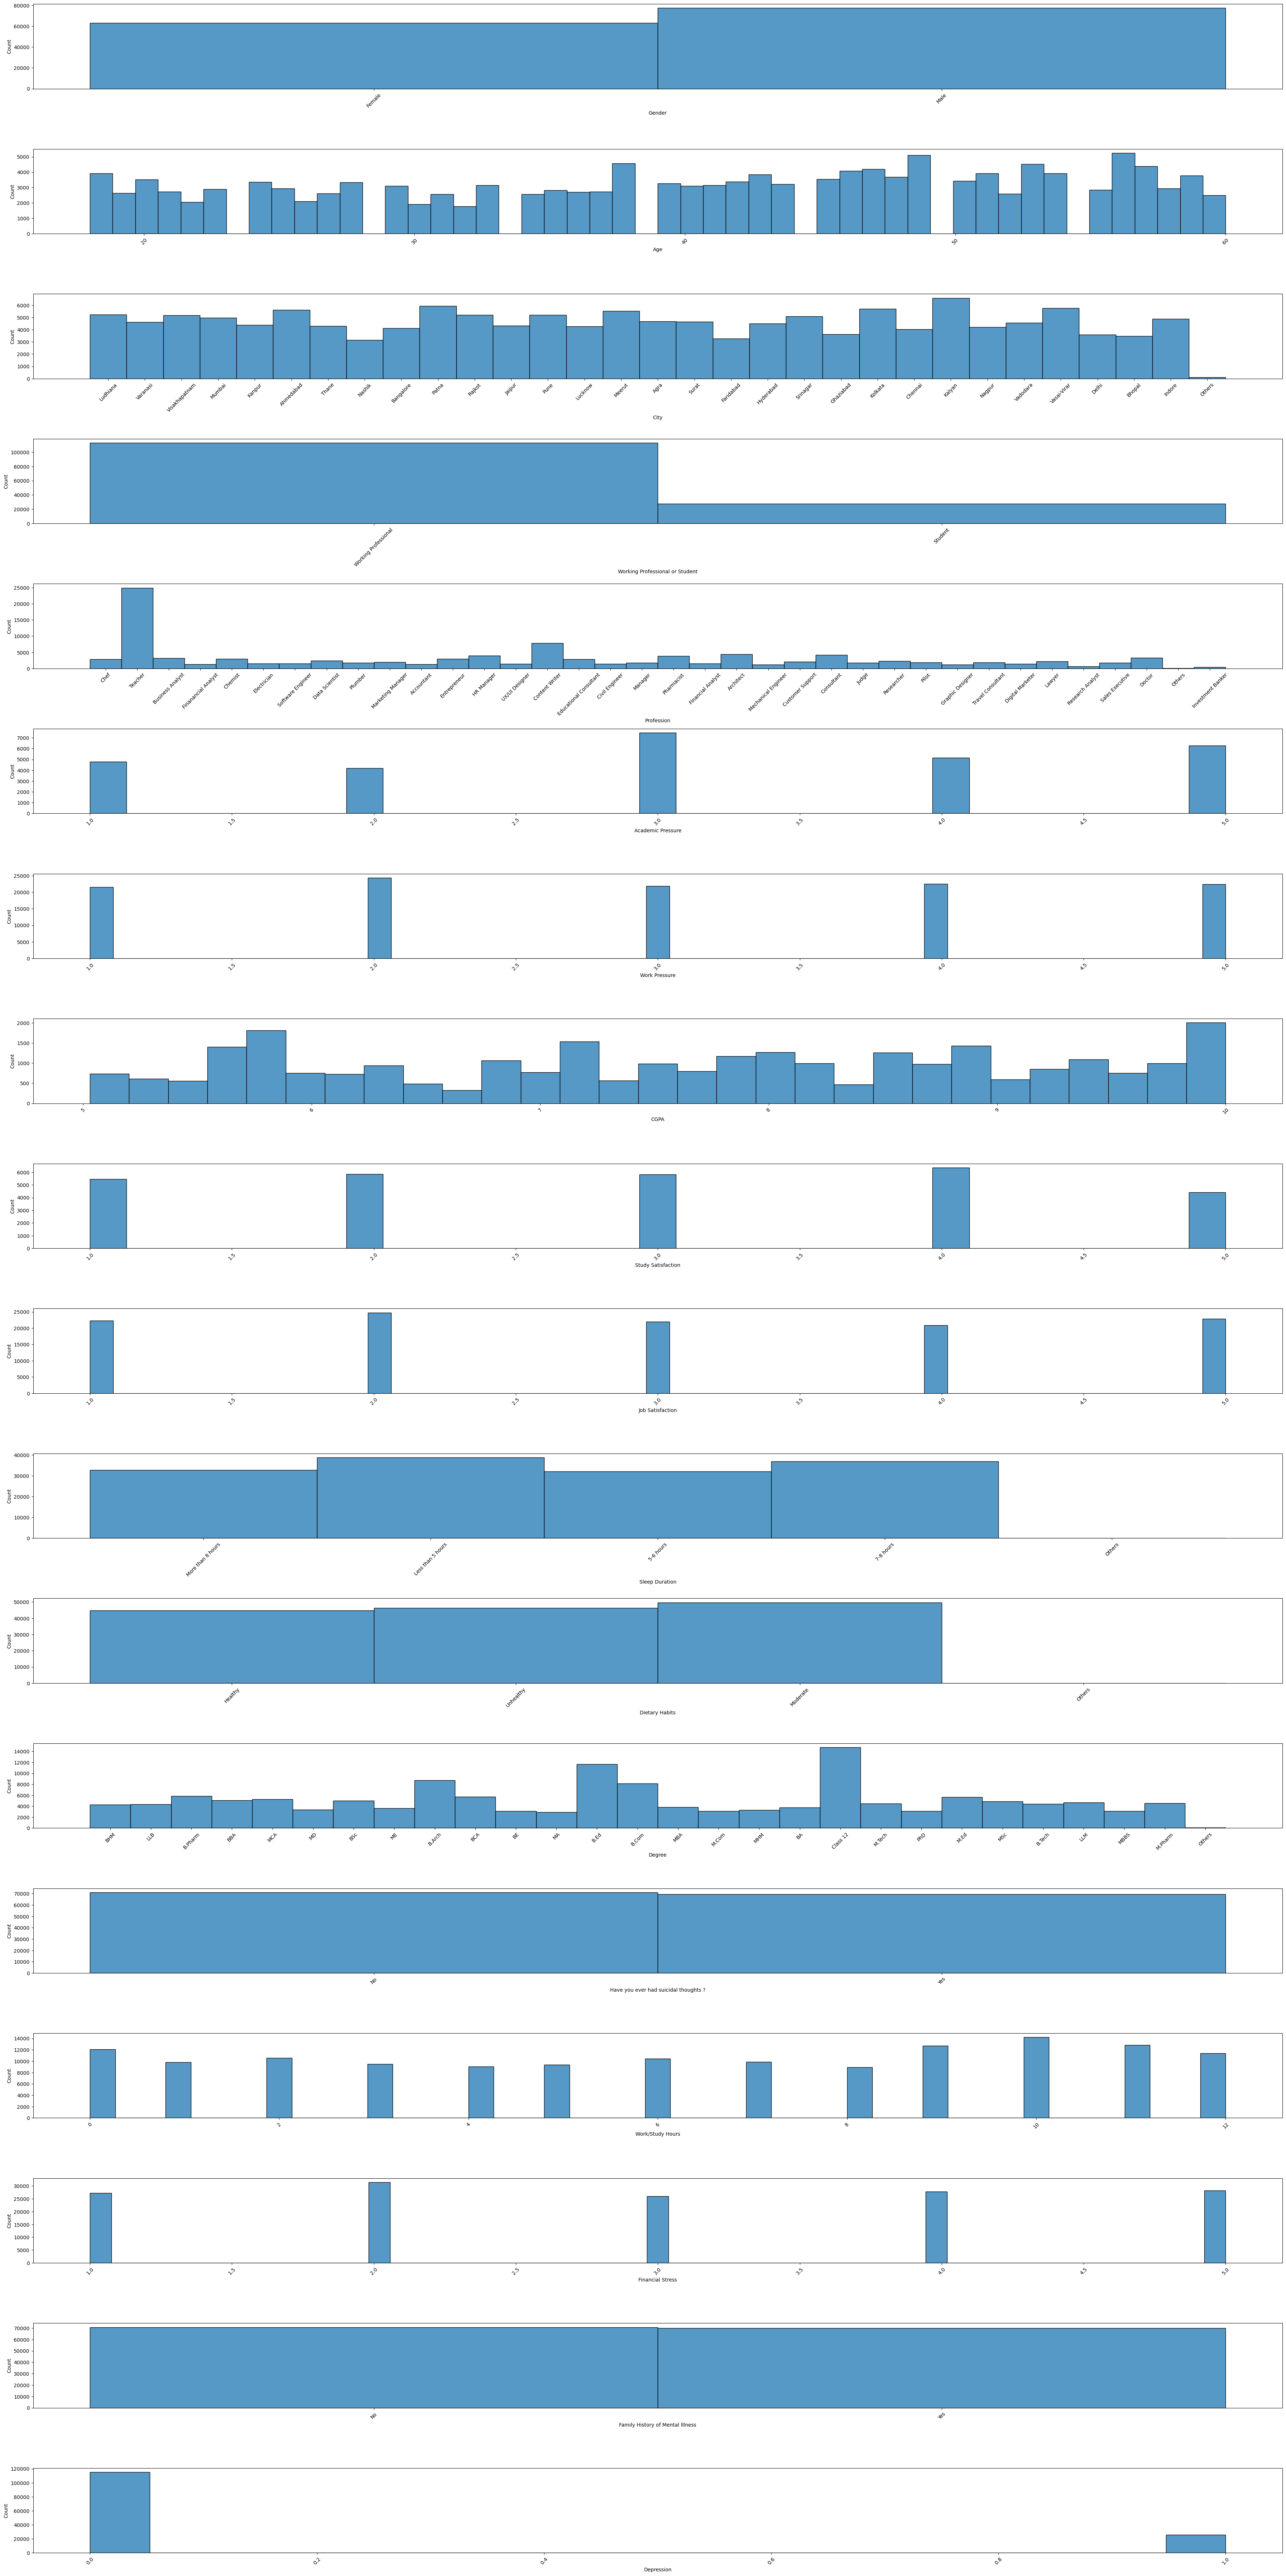

In [16]:
plt.figure(figsize= (36,72))
for n,col in enumerate(feats):
    plt.subplot(len(feats),1,n+1)
    sns.histplot(df1, x = col)
    plt.xticks(rotation = 45)
plt.tight_layout()

#### Explore missingness
Lets check a Cramers's V matrix between columns for values flagged as missing / not-missings for the repective columns.

In [17]:
from scipy.stats import chi2_contingency
from numpy.typing import ArrayLike

def cramers_v(df:pd.DataFrame):
    feats = df.columns
    V_matrix = np.zeros((len(feats),len(feats)))
    for i in range(len(feats)):
        for j in range(len(feats)):
            contingency_table = pd.crosstab(df[feats[i]], df[feats[j]])
            chi2,_,_,_ = chi2_contingency(contingency_table)
            n = df.shape[0]
            r = contingency_table.shape[0]
            c = contingency_table.shape[1]
            try:
                v = (chi2/(n*(min(r,c)-1)))**0.5
            except ZeroDivisionError as e:
                v = 0
            V_matrix[i][j] = v
    return V_matrix

corr_missingness = cramers_v(df1.isnull().replace(True,1).replace(False,0))

C:\Users\Richard\AppData\Local\Temp\ipykernel_21340\1246023004.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_missingness = cramers_v(df1.isnull().replace(True,1).replace(False,0))


<Axes: >

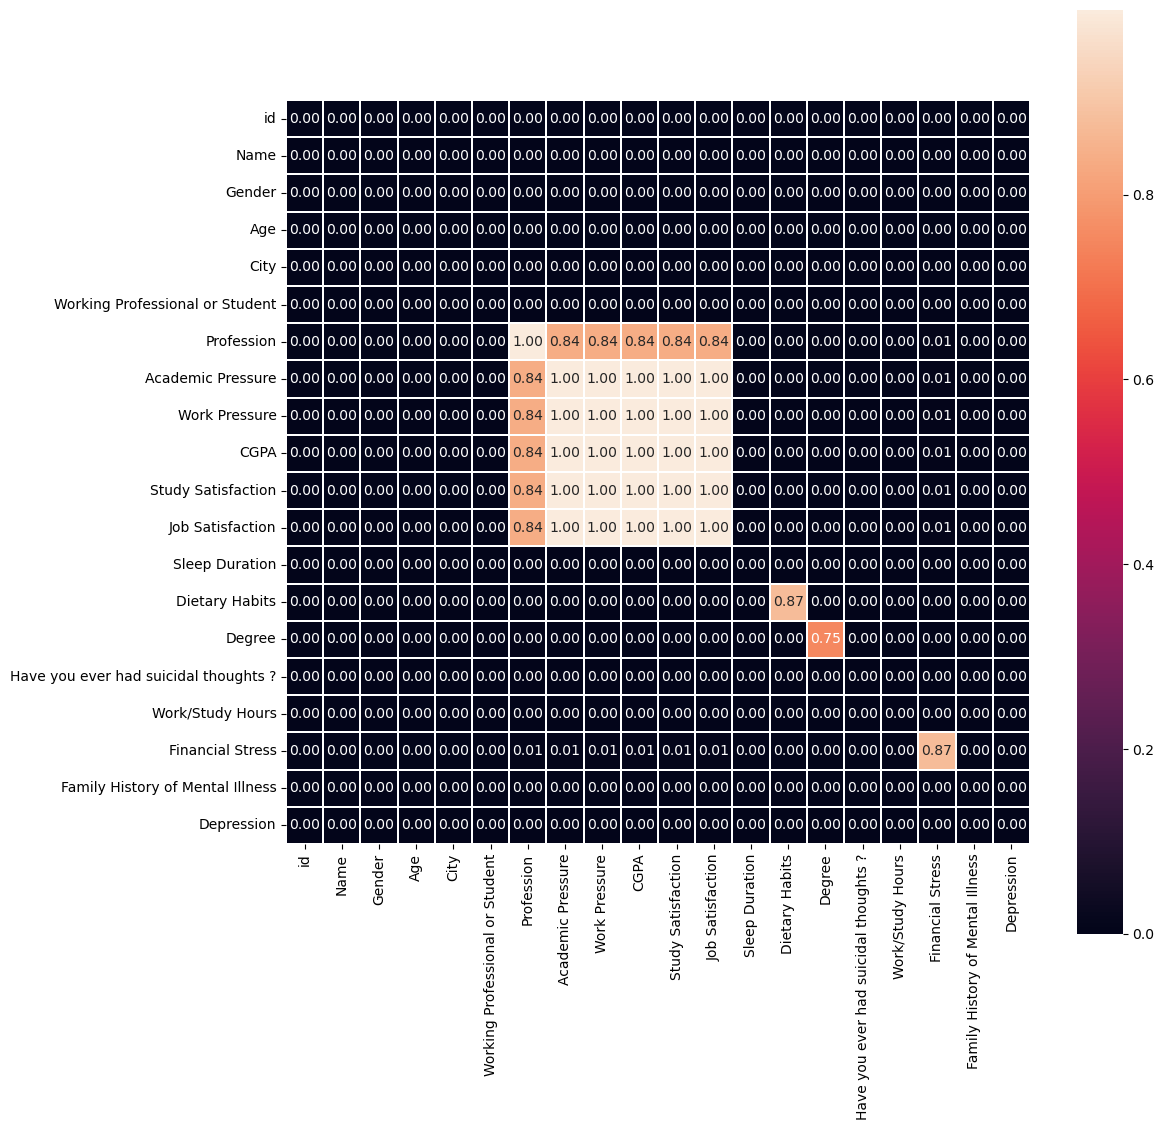

In [18]:
corr_missingness = pd.DataFrame(corr_missingness, index=df1.columns, columns=df1.columns)
plt.figure(figsize = (12,12))
sns.heatmap(corr_missingness,square=True, linewidths=0.2, annot = True, fmt = '0.2f')

Basically, this means that the variables that have high missigness are all very closeely associated in termss of their locationn of missingness. As a high cramer'sv correalation coefficient (in most cases perfectly correlated) imples that the variables with high missingness the missing values all seem to correspond to the same observations. Let's check that out by grouping the missingness of values by some of the categorical variables.

In [19]:
df1[['Working Professional or Student','Academic Pressure','Work Pressure','CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Profession' ,'id']].groupby(['Working Professional or Student']).count()

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Profession,id
Working Professional or Student,,,,,,,
Student,27892,3,27892,27891,8,34,27901
Working Professional,5,112779,6,6,112782,104036,112799


The missingness is due to 2 categories of respondents forming mutually exlusive groups (Students and Working Professionals) with respect to certain variables which when relvent to one are not relevant to the other, resulting in a null response from the group for which the variable is not relevent.

- Missing values in CGPA can be replaced with 0. The 'Working Professional or Student' column can act as a helper column to flag the relevence of the variable for the category.

In [20]:
df1[(df1['Working Professional or Student']=='Student') & (df1['Profession'].isna())] = df1[(df1['Working Professional or Student']=='Student') & (df1['Profession'].isna())].fillna(value= {'Work Pressure':0,'Job Satisfaction':0, 'Profession':'None'})
df1[df1['Working Professional or Student']=='Working Professional'] = df1[df1['Working Professional or Student']=='Working Professional'].fillna(value= {'Academic Pressure':0, 'Study Satisfaction':0,'CGPA':0, 'Profession':'Not Reported'})

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Academic Pressure                      140691 non-null  float64
 8   Work Pressure                          140646 non-null  float64
 9   CGPA                                   140691 non-null  float64
 10  Study Satisfaction                     140690 non-null  

C:\Users\Richard\AppData\Local\Temp\ipykernel_21340\3177548177.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_missingness = cramers_v(df1.isnull().replace(True,1).replace(False,0))


<Axes: >

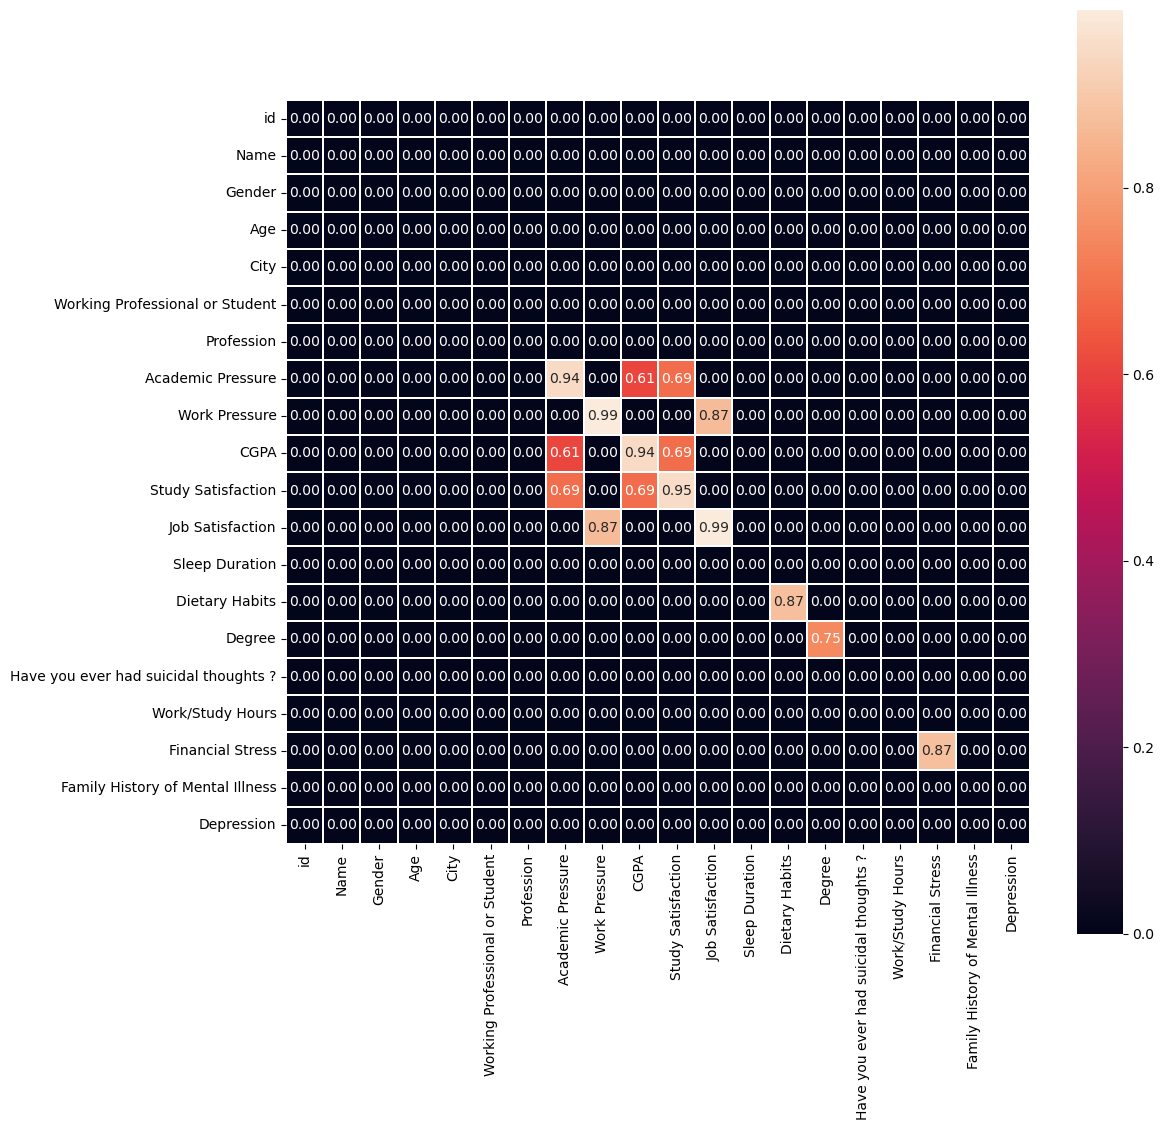

In [22]:
corr_missingness = cramers_v(df1.isnull().replace(True,1).replace(False,0))
corr_missingness = pd.DataFrame(corr_missingness, index=df1.columns, columns=df1.columns)
plt.figure(figsize = (12,12))
sns.heatmap(corr_missingness,square=True, linewidths=0.2, annot = True, fmt = '0.2f')

In [23]:
df1.isna().sum()/len(df1)*100

id                                       0.000000
Name                                     0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Working Professional or Student          0.000000
Profession                               0.000000
Academic Pressure                        0.006397
Work Pressure                            0.038380
CGPA                                     0.006397
Study Satisfaction                       0.007107
Job Satisfaction                         0.036247
Sleep Duration                           0.000000
Dietary Habits                           0.002843
Degree                                   0.001421
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.002843
Family History of Mental Illness         0.000000
Depression                               0.000000


In [24]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140617 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140617 non-null  int64  
 1   Name                                   140617 non-null  object 
 2   Gender                                 140617 non-null  object 
 3   Age                                    140617 non-null  float64
 4   City                                   140617 non-null  object 
 5   Working Professional or Student        140617 non-null  object 
 6   Profession                             140617 non-null  object 
 7   Academic Pressure                      140617 non-null  float64
 8   Work Pressure                          140617 non-null  float64
 9   CGPA                                   140617 non-null  float64
 10  Study Satisfaction                     140617 non-null  float

In [25]:
df2.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

#### Preprocessing aand Encoding

In [26]:
df2.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,None,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Selection and encoding for modelling:
- Drop columns: id, Name
- Dummies: Gender, Working Professional or Student, Havve you ever had suicidal thoughts?, Family History of Mental Illness
- Target Encoding: City, Profession, Degree
- Ordinal Encoding: Sleep Duration, Dietary habits

In [27]:
df_dummies = pd.get_dummies(df2[['Gender', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']], drop_first=True)
df_dummies.head()

,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,False,True,False,False
1,True,True,True,False
2,True,False,True,False
3,True,True,True,True
4,False,True,True,True


In [28]:
df2['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Others'], dtype=object)

In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

oenc = OrdinalEncoder(categories=[['Others','Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours'],['Others','Unhealthy','Moderate','Healthy']])
df_ordinal = oenc.fit_transform(df2[['Sleep Duration', 'Dietary Habits']])
df_ordinal = pd.DataFrame(df_ordinal, columns = oenc.get_feature_names_out(), index = df2.index)
df_ordinal.head()

,Sleep Duration,Dietary Habits
0,4.0,3.0
1,1.0,1.0
2,2.0,3.0
3,1.0,2.0
4,2.0,1.0


In [30]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140617 entries, 0 to 140699
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sleep Duration  140617 non-null  float64
 1   Dietary Habits  140617 non-null  float64
dtypes: float64(2)
memory usage: 3.2 MB


In [31]:
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold

tenc = TargetEncoder(smoothing=500)
kf = KFold(n_splits=10,shuffle = True, random_state=22)
df_targetenc = pd.DataFrame(index = df2.index, columns = ['City', 'Profession', 'Degree'])
X = df2[['City', 'Profession','Degree']]
y = df2['Depression']
for train_idx, test_idx in kf.split(X):   
    tenc.fit(X.iloc[train_idx,:],y.iloc[train_idx])
    df_targetenc.iloc[test_idx,:] = tenc.transform(X.iloc[test_idx,:])
df_targetenc.head()

,City,Profession,Degree
0,0.192315,0.049381,0.172525
1,0.141557,0.055931,0.152036
2,0.161581,0.586843,0.11945
3,0.129277,0.05505,0.133324
4,0.124416,0.056783,0.13671


In [32]:
df3 = pd.concat([df_dummies,df_ordinal,df_targetenc, df2[['Age', 'Academic Pressure' ,'Work Pressure','CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours','Financial Stress','Depression']]], axis = 1)
df3.head()

,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Sleep Duration,Dietary Habits,City,Profession,Degree,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,False,True,False,False,4.0,3.0,0.192315,0.049381,0.172525,49.0,0.0,5.0,0.00,0.0,2.0,1.0,2.0,0
1,True,True,True,False,1.0,1.0,0.141557,0.055931,0.152036,26.0,0.0,4.0,0.00,0.0,3.0,7.0,3.0,1
2,True,False,True,False,2.0,3.0,0.161581,0.586843,0.11945,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
3,True,True,True,True,1.0,2.0,0.129277,0.05505,0.133324,22.0,0.0,5.0,0.00,0.0,1.0,10.0,1.0,1
4,False,True,True,True,2.0,1.0,0.124416,0.056783,0.13671,30.0,0.0,1.0,0.00,0.0,1.0,9.0,4.0,0


#### Scaling

In [33]:
df3.isna().sum()

Gender_Male                                             0
Working Professional or Student_Working Professional    0
Have you ever had suicidal thoughts ?_Yes               0
Family History of Mental Illness_Yes                    0
Sleep Duration                                          0
Dietary Habits                                          0
City                                                    0
Profession                                              0
Degree                                                  0
Age                                                     0
Academic Pressure                                       0
Work Pressure                                           0
CGPA                                                    0
Study Satisfaction                                      0
Job Satisfaction                                        0
Work/Study Hours                                        0
Financial Stress                                        0
Depression    

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3[df3.columns[4:-1]])
df3_scaled = pd.DataFrame(df3_scaled, columns=scaler.get_feature_names_out(), index = df3.index)
df3_scaled = pd.concat([df3_scaled, df3[df3.columns[:4]]], axis = 1)
df3_scaled['Depression'] = df3['Depression']

In [35]:
df3_scaled.isna().sum()

Sleep Duration                                          0
Dietary Habits                                          0
City                                                    0
Profession                                              0
Degree                                                  0
Age                                                     0
Academic Pressure                                       0
Work Pressure                                           0
CGPA                                                    0
Study Satisfaction                                      0
Job Satisfaction                                        0
Work/Study Hours                                        0
Financial Stress                                        0
Gender_Male                                             0
Working Professional or Student_Working Professional    0
Have you ever had suicidal thoughts ?_Yes               0
Family History of Mental Illness_Yes                    0
Depression    

In [36]:
df3_scaled.head()

,Sleep Duration,Dietary Habits,City,Profession,Degree,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Depression
0,1.375722,1.256639,0.324379,-0.622473,-0.076125,0.694878,-0.446121,1.494939,-0.485981,-0.441647,-0.222027,-1.363074,-0.699514,False,True,False,False,0
1,-1.289036,-1.229553,-1.191739,-0.591992,-0.250574,-1.162601,-0.446121,0.918850,-0.485981,-0.441647,0.354055,0.193968,0.007903,True,True,True,False,1
2,-0.400783,1.256639,-0.593613,1.878403,-0.528025,-0.597281,3.138982,-1.385507,2.388072,1.073026,-1.374189,-0.844060,-1.406930,True,False,True,False,1
3,-1.289036,0.013543,-1.558524,-0.596094,-0.409891,-1.485641,-0.446121,1.494939,-0.485981,-0.441647,-0.798108,0.972490,-1.406930,True,True,True,True,1
4,-0.400783,-1.229553,-1.703703,-0.588027,-0.381061,-0.839561,-0.446121,-0.809418,-0.485981,-0.441647,-0.798108,0.712983,0.715320,False,True,True,True,0


#### Predictive Modelling
##### Baseline Model - Logisitic Model

In [37]:
print(df3_scaled.isna().sum())

Sleep Duration                                          0
Dietary Habits                                          0
City                                                    0
Profession                                              0
Degree                                                  0
Age                                                     0
Academic Pressure                                       0
Work Pressure                                           0
CGPA                                                    0
Study Satisfaction                                      0
Job Satisfaction                                        0
Work/Study Hours                                        0
Financial Stress                                        0
Gender_Male                                             0
Working Professional or Student_Working Professional    0
Have you ever had suicidal thoughts ?_Yes               0
Family History of Mental Illness_Yes                    0
Depression    

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df3_scaled.copy()
y = X.pop('Depression')
logit_m = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)
fitted_logit_m = logit_m.fit(X_train, y_train)

y_pred_proba_tr = fitted_logit_m.predict_proba(X_train)
y_pred_proba_te = fitted_logit_m.predict_proba(X_test)

from sklearn.metrics import roc_curve, roc_auc_score

auc_tr = roc_auc_score(y_train, y_pred_proba_tr[:,1])
auc_te = roc_auc_score(y_test, y_pred_proba_te[:,1])



print(f'The respective training and test auc scores are: {auc_tr:.2f} and {auc_te:.2f}')



The respective training and test auc scores are: 0.97 and 0.97


<Axes: >

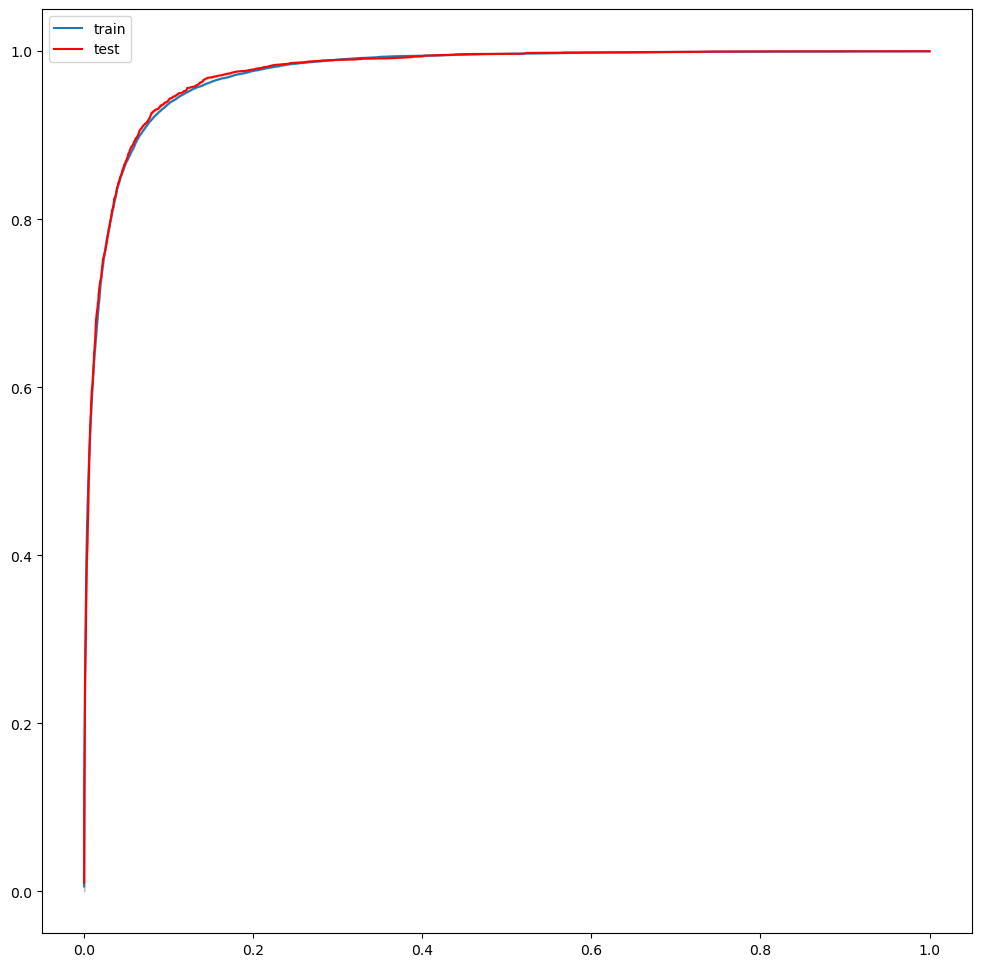

In [39]:
fpr_tr, tpr_tr, thresh_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
fpr_te, tpr_te, thresh_te = roc_curve(y_test, y_pred_proba_te[:,1])

plt.figure(figsize=(12,12))
sns.lineplot(x = fpr_tr, y = tpr_tr, label = 'train')
sns.lineplot(x = fpr_te, y = tpr_te, color = 'red', label = 'test')

#### Logistic Regression with balanced (class_weighted) data 

In [40]:
from typing import Protocol

class MLModel(Protocol):
    def fit(self, X,y) -> None:
        ...
    
    def predict_proba(self, X) -> None:
        ...
    
    def predict(self, X) -> None:
        ...

In [41]:
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve
from sklearn.model_selection import KFold
kf = KFold(10, shuffle=True, random_state=22)

In [42]:
def model_predict(model: MLModel, X, y, fp_upper_limit = 0.1, tp_lower_limit = 0.85):
    """Takes in a model, predictor and target dataframes/series, to return the accuracy scores for model predictions regulated by the respective threshold values corresponding to user defined tp and fp limits on the roc curve generated by the function for classification problems"""
    
    n = 1
    acc_df =  {'fold':[],'thresh':[],'accuracy':[]}
    sample_wt_exists = hasattr(model, 'class_weight')
    
    for train_idx, test_idx in kf.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
        
        if sample_wt_exists:
            sample_weights = None
        else:
            value_ratio = {0: y_train.value_counts()[0]/y_train.shape[0],1:y_train.value_counts()[1]/y_train.shape[0]}
            sample_weights = y_train.apply(lambda x:  1- value_ratio[x])
            
        fitted_model = model.fit(X_train, y_train, sample_weight = sample_weights)

        y_pred_proba_tr = fitted_model.predict_proba(X_train)
        y_pred_proba_te = fitted_model.predict_proba(X_test)

        auc_tr = roc_auc_score(y_train, y_pred_proba_tr[:,1])
        auc_te = roc_auc_score(y_test, y_pred_proba_te[:,1])

        # fpr_tr, tpr_tr, thresh_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
        fpr_te, tpr_te, thresh_te = roc_curve(y_test, y_pred_proba_te[:,1])

        # plt.figure(figsize=(12,12))
        # sns.lineplot(x = fpr_tr, y = tpr_tr, label = 'train')
        # sns.lineplot(x = fpr_te, y = tpr_te, color = 'red', label = 'test')

        print(f'The respective training and test auc scores for fold {n} for {str(model)} are: {auc_tr:.2f} and {auc_te:.2f}')
            
        optimal_thresholds_te = thresh_te[(fpr_te <= fp_upper_limit) & (tpr_te >= tp_lower_limit)]
        accuracies = [accuracy_score(y_test, y_pred_proba_te[:,1]>=x) for x in optimal_thresholds_te]
        max_accuracy = max(accuracies)
        max_idx = accuracies.index(max_accuracy)
        acc_scores = {'fold':n,'thresh':optimal_thresholds_te[max_idx],'accuracy':max_accuracy}
        for key in acc_scores:
            acc_df[key].append(acc_scores[key])
        
        n+=1
        
        mean_optimal_threshold = {'optimal_threshold':np.mean(acc_df['thresh']),'mean_accuracy': np.mean(acc_df['accuracy']),'fold_details': pd.DataFrame(acc_df)}
    
    return mean_optimal_threshold

In [43]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# candidate_models = [LogisticRegression(class_weight='balanced', solver='saga'),RandomForestClassifier(class_weight='balanced'),AdaBoostClassifier(),GradientBoostingClassifier()]

# parameters = [{'penalty':['l1','l2','elasticnet']},{'n_estimators':[50, 100, 200],'criterion':['gini','entropy','log_loss'],'max_depth':[None,50,100,200],'ccp_alpha':[0,0.0001,0.001]},{'n_estimators':[50,100,200],'learning_rate':[0.2,0.5,1]},{'learning_rate':[0.1,0.5,0.8],'n_estimators':[50,100,200],'subsample':[0.2,0.6,1]}]

# cv_results = []

# for i,m in enumerate(candidate_models):
#     gcv = GridSearchCV(m,parameters[i], scoring = 'accuracy')
#     gcv.fit(X_train, y_train)
#     cv_result = gcv.cv_results_
#     cv_results.append(cv_result)
    

In [44]:
# pd.DataFrame(cv_results[0]).to_csv("gscv_logistic.csv")
# pd.DataFrame(cv_results[1]).to_csv("gscv_rf.csv")
# pd.DataFrame(cv_results[2]).to_csv("gscv_ada.csv")
# pd.DataFrame(cv_results[3]).to_csv("gscv_gboost.csv")


In [83]:
from sklearn.ensemble import AdaBoostClassifier #, RandomForestClassifier, , GradientBoostingClassifier
chosen_models = [AdaBoostClassifier(n_estimators = 200)]
model_results = []
for m in chosen_models:
    model_result = model_predict(m, X,y)
    model_result['model'] = str(m)
    model_results.append(model_result)
model_results
    
# pd.DataFrame({'model':model_results[0],'optimal_threshold':model_results[1], 'mean_accuracy':model_results[2]})

c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 1 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.97


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 2 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.98


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 3 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.97


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 4 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.98


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 5 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.97


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 6 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.97


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 7 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.98


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 8 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.97


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 9 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.98


c:\Users\Richard\Anaconda3\envs\py35\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The respective training and test auc scores for fold 10 for AdaBoostClassifier(n_estimators=200) are: 0.98 and 0.98


[{'optimal_threshold': 0.5014777436797294,
  'mean_accuracy': 0.9384854247282733,
  'fold_details':    fold    thresh  accuracy
  0     1  0.501334  0.936993
  1     2  0.501525  0.940122
  2     3  0.501458  0.935855
  3     4  0.501543  0.940905
  4     5  0.501304  0.935927
  5     6  0.501486  0.937562
  6     7  0.501458  0.937064
  7     8  0.501410  0.937984
  8     9  0.501615  0.940829
  9    10  0.501644  0.941612,
  'model': 'AdaBoostClassifier(n_estimators=200)'}]

In [46]:
# from sklearn.model_selection import GridSearchCV

# RandomForestClassifier()
# paramgird_rf = {'n_estimators':[50,100,150,200],'criterion':['gini','entropy','log_loss'],'min_samples_leaf':[0.005,0.01,0.02,0.05]}

# gridsearch = GridSearchCV(rf_model,paramgird_rf)

# gridsearch.fit(X_train, y_train)

# gridsearch_results = gridsearch.cv_results_

### Validation Dataset


In [126]:
df_val = pd.read_csv("test.csv")
df_val.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


### Cleaning

In [127]:
flist = ['City', 'Profession', 'Sleep Duration', 'Degree', 'Dietary Habits']
for n in flist:
    unique_list = df1[n].unique()
    df_val[n] = df_val[n].apply(lambda x: 'Others' if not pd.isna(x) and x not in unique_list else x)

In [128]:
df_val['Dietary Habits'].value_counts()

Dietary Habits
Moderate     33018
Unhealthy    30786
Healthy      29966
Others          25
Name: count, dtype: int64

In [129]:
df_val[(df_val['Working Professional or Student']=='Student') & (df_val['Profession'].isna())] = df_val[(df_val['Working Professional or Student']=='Student') & (df_val['Profession'].isna())].fillna(value= {'Work Pressure':0,'Job Satisfaction':0, 'Profession':'None'})
df_val[df_val['Working Professional or Student']=='Working Professional'] = df_val[df_val['Working Professional or Student']=='Working Professional'].fillna(value= {'Academic Pressure':0, 'Study Satisfaction':0,'CGPA':0, 'Profession':'Not Reported'})

In [130]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  object 
 7   Academic Pressure                      93793 non-null  float64
 8   Work Pressure                          93764 non-null  float64
 9   CGPA                                   93791 non-null  float64
 10  Study Satisfaction                     93792 non-null  float64
 11  Jo

In [131]:
df_val['CGPA'] = df_val['CGPA'].fillna(df_val['CGPA'].mean())

from scipy.stats import mode
for n in ['Academic Pressure', 'Work Pressure','Study Satisfaction','Job Satisfaction']:

    mode_value =  mode(df_val[n]).mode
    df_val[n] = df_val[n].fillna(mode_value)

In [132]:
df_val['Dietary Habits'] = df_val['Dietary Habits'].fillna('Others')
df_val['Degree'] = df_val['Degree'].fillna('Others')

In [133]:
val_id = df_val.pop('id')
df_val.drop(columns = ['Name'], inplace = True)
val_dummies = pd.get_dummies(df_val[['Gender', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']], drop_first=True)
val_dummies.head()

,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,True,True,False,True
1,False,True,False,False
2,True,True,True,False
3,False,False,True,False
4,True,True,True,False


In [134]:
val_ordinal = oenc.transform(df_val[['Sleep Duration', 'Dietary Habits']])
val_ordinal = pd.DataFrame(val_ordinal, columns = oenc.get_feature_names_out(), index = df_val.index)
val_ordinal.head()

,Sleep Duration,Dietary Habits
0,1.0,2.0
1,1.0,2.0
2,3.0,2.0
3,4.0,2.0
4,3.0,2.0


In [135]:
df_targetenc_renamed = df_targetenc.rename(columns = {'City':'city','Profession':'profession','Degree':'degree'})
agg_target_enc = pd.concat([df1[['City', 'Profession', 'Degree']],df_targetenc_renamed], axis = 1)
agg_target_enc

,City,Profession,Degree,city,profession,degree
0,Ludhiana,Chef,BHM,0.192315,0.049381,0.172525
1,Varanasi,Teacher,LLB,0.141557,0.055931,0.152036
2,Visakhapatnam,None,B.Pharm,0.161581,0.586843,0.11945
3,Mumbai,Teacher,BBA,0.129277,0.05505,0.133324
4,Kanpur,Business Analyst,BBA,0.124416,0.056783,0.13671
...,...,...,...,...,...,...
140695,Ahmedabad,Not Reported,Class 12,0.218854,0.373325,0.512735
140696,Hyderabad,Content Writer,B.Tech,0.274116,0.018146,0.211201
140697,Kolkata,Marketing Manager,B.Com,0.173888,0.054538,0.156809
140698,Srinagar,Plumber,ME,0.210397,0.070703,0.071763


In [136]:
mean_enc_city = agg_target_enc[['City','city']].groupby(['City']).mean().reset_index().set_index('City')['city'].to_dict()
mean_enc_profession = agg_target_enc[['Profession','profession']].groupby(['Profession']).mean().reset_index().set_index('Profession')['profession'].to_dict()
mean_enc_degree = agg_target_enc[['Degree','degree']].groupby(['Degree']).mean().reset_index().set_index('Degree')['degree'].to_dict()



In [137]:
mean_enc_city

{'Agra': 0.19199391040792188,
 'Ahmedabad': 0.21731917801172973,
 'Bangalore': 0.1751897731946884,
 'Bhopal': 0.23231658660071627,
 'Chennai': 0.19420663200636135,
 'Delhi': 0.19160964089357418,
 'Faridabad': 0.14651566188341533,
 'Ghaziabad': 0.19476122586940628,
 'Hyderabad': 0.275178653673035,
 'Indore': 0.16093741696784788,
 'Jaipur': 0.18121452376709024,
 'Kalyan': 0.19872941467884694,
 'Kanpur': 0.125125967636177,
 'Kolkata': 0.17361141468117192,
 'Lucknow': 0.2140919987431134,
 'Ludhiana': 0.1925880052388789,
 'Meerut': 0.13363166861994688,
 'Mumbai': 0.13109828786587852,
 'Nagpur': 0.14498082206740864,
 'Nashik': 0.15864170431282432,
 'Others': 0.18683664573538322,
 'Patna': 0.16295818671470802,
 'Pune': 0.16112691334770532,
 'Rajkot': 0.17298558789879953,
 'Srinagar': 0.2115685879255353,
 'Surat': 0.20169537132656495,
 'Thane': 0.2420550431145841,
 'Vadodara': 0.16701284908086214,
 'Varanasi': 0.14186281458430405,
 'Vasai-Virar': 0.19777664214251806,
 'Visakhapatnam': 0.158868

In [138]:
val_city_target_enc = df_val['City'].map(mean_enc_city)
val_profession_target_enc = df_val['Profession'].map(mean_enc_profession)
val_degree_target_enc = df_val['Degree'].map(mean_enc_degree)

In [139]:
df_val.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Visakhapatnam,Working Professional,Judge,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,0.0,2.0,0.00,0.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Jaipur,Working Professional,Teacher,0.0,4.0,0.00,0.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Rajkot,Student,None,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Kalyan,Working Professional,Teacher,0.0,5.0,0.00,0.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [140]:
df_val_transformed = pd.concat([df_val[[x for x in df_val.columns if df_val[x].dtype != 'object']],val_dummies,val_ordinal,val_city_target_enc,val_profession_target_enc,val_degree_target_enc], axis = 1)
df_val_transformed.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Sleep Duration,Dietary Habits,City,Profession,Degree
0,53.0,0.0,2.0,0.00,0.0,5.0,9.0,3.0,True,True,False,True,1.0,2.0,0.158868,0.111969,0.150689
1,58.0,0.0,2.0,0.00,0.0,4.0,6.0,4.0,False,True,False,False,1.0,2.0,0.173611,0.075014,0.128483
2,53.0,0.0,4.0,0.00,0.0,1.0,12.0,4.0,True,True,True,False,3.0,2.0,0.181215,0.055459,0.157441
3,23.0,5.0,0.0,6.84,1.0,0.0,10.0,4.0,False,False,True,False,4.0,2.0,0.172986,0.585248,0.155250
4,47.0,0.0,5.0,0.00,0.0,5.0,3.0,4.0,True,True,True,False,3.0,2.0,0.198729,0.055459,0.203570


In [141]:
df_val_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   93800 non-null  float64
 1   Academic Pressure                                     93800 non-null  float64
 2   Work Pressure                                         93800 non-null  float64
 3   CGPA                                                  93800 non-null  float64
 4   Study Satisfaction                                    93800 non-null  float64
 5   Job Satisfaction                                      93800 non-null  float64
 6   Work/Study Hours                                      93800 non-null  float64
 7   Financial Stress                                      93800 non-null  float64
 8   Gender_Male                                           93

In [142]:
df_val_scaled = pd.concat([pd.DataFrame(scaler.transform(df_val_transformed[scaler.get_feature_names_out()]), columns=scaler.get_feature_names_out()),df_val_transformed[[x for x in df_val_transformed.columns if df_val_transformed[x].dtype != 'float64']]], axis = 1)
df_val_scaled.head()

,Sleep Duration,Dietary Habits,City,Profession,Degree,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,-1.289036,0.013543,-0.674653,-0.331242,-0.262042,1.017918,-0.446121,-0.233329,-0.485981,-0.441647,1.506217,0.712983,0.007903,True,True,False,True
1,-1.289036,0.013543,-0.234282,-0.503197,-0.451116,1.421718,-0.446121,-0.233329,-0.485981,-0.441647,0.930136,-0.065539,0.715320,False,True,False,False
2,0.487469,0.013543,-0.007182,-0.594187,-0.204550,1.017918,-0.446121,0.918850,-0.485981,-0.441647,-0.798108,1.491504,0.715320,True,True,True,False
3,1.375722,0.013543,-0.252975,1.870981,-0.223207,-1.404881,3.138982,-1.385507,1.705604,0.315689,-1.374189,0.972490,0.715320,False,False,True,False
4,0.487469,0.013543,0.515975,-0.594187,0.188209,0.533359,-0.446121,1.494939,-0.485981,-0.441647,1.506217,-0.844060,0.715320,True,True,True,False


In [143]:
df_val.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

0.501644

In [ ]:
ada = AdaBoostClassifier(n_estimators=200)

value_ratio = {0: y.value_counts()[0]/y.shape[0],1:y.value_counts()[1]/y.shape[0]}
sample_weights = y.apply(lambda x:  1- value_ratio[x])

fitted_ada = ada.fit(X,y, sample_weight = sample_weights)
y_pred_proba_te = fitted_ada.predict_proba(df_val_scaled)
final_predication = y_pred_proba_te[:,1]>0.501644
final_predication  = pd.DataFrame({'id':val_id,'Depression':final_predication})
final_predication['Depression'] = final_predication['Depression'].replace({True:1,False:0})


C:\Users\Richard\AppData\Local\Temp\ipykernel_21340\3058732407.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_predication['Depression'] = final_predication['Depression'].replace({True:1,False:0})


In [154]:
final_predication.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [155]:
final_predication.to_csv("ada_200_prediction.csv", index=False)